In [89]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

In [90]:
import pandas as pd
COLUMNS = ["subject", "age", "sex", "test_time", "motor_UPDRS",
           "total_UPDRS", "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5",
           "Jitter:DDP", "Shimmer", "Shimmer(dB)", "Shimmer:APQ3",
           "Shimmer:APQ5","Shimmer:APQ11","Shimmer:DDA","NHR","HNR",
          "RPDE","DFA","PPE"]
#沒有缺失值
train_df = pd.read_csv(
    "C:/Users/IDSL/Desktop/G.Z/Machine Learning/data2/parkinsons_updrs.data",
    names=COLUMNS,
    #文件開啟要跳過第幾行
    skiprows=[0],
    engine='python',)

In [91]:
train_df

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [92]:
X_train = train_df.drop(['test_time','sex'], axis=1)
Y_train = train_df["HNR"]

In [93]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
zscore  = StandardScaler()
X_train[['subject']] = zscore.fit_transform(X_train[['subject']])
X_train[['age']] = zscore.fit_transform(X_train[['age']])
#X_train[['sex']] = zscore.fit_transform(X_train[['sex']])
X_train[['motor_UPDRS']] = zscore.fit_transform(X_train[['motor_UPDRS']])
X_train[['total_UPDRS']] = zscore.fit_transform(X_train[['total_UPDRS']])
X_train[['Jitter(%)']] = zscore.fit_transform(X_train[['Jitter(%)']])
X_train[['Jitter(Abs)']] = zscore.fit_transform(X_train[['Jitter(Abs)']])
X_train[['Jitter:RAP']] = zscore.fit_transform(X_train[['Jitter:RAP']])
X_train[['Jitter:PPQ5']] = zscore.fit_transform(X_train[['Jitter:PPQ5']])
X_train[['Jitter:DDP']] = zscore.fit_transform(X_train[['Jitter:DDP']])
X_train[['Shimmer']] = zscore.fit_transform(X_train[['Shimmer']])
X_train[['Shimmer(dB)']] = zscore.fit_transform(X_train[['Shimmer(dB)']])
X_train[['Shimmer:APQ3']] = zscore.fit_transform(X_train[['Shimmer:APQ3']])
X_train[['Shimmer:APQ5']] = zscore.fit_transform(X_train[['Shimmer:APQ5']])
X_train[['Shimmer:APQ11']] = zscore.fit_transform(X_train[['Shimmer:APQ11']])
X_train[['Shimmer:DDA']] = zscore.fit_transform(X_train[['Shimmer:DDA']])
X_train[['NHR']] = zscore.fit_transform(X_train[['NHR']])
X_train[['RPDE']] = zscore.fit_transform(X_train[['RPDE']])
X_train[['DFA']] = zscore.fit_transform(X_train[['DFA']])
X_train[['PPE']] = zscore.fit_transform(X_train[['PPE']])

In [94]:
X_train.corr()

,subject,age,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject,1.000000,-0.030864,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,0.146202,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
motor_UPDRS,0.252919,0.273665,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,0.102349,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.120350,0.010258,0.072698,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660
Shimmer,0.146202,0.101554,0.102349,0.092141,0.709791,0.649046,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709


<function matplotlib.pyplot.show(close=None, block=None)>

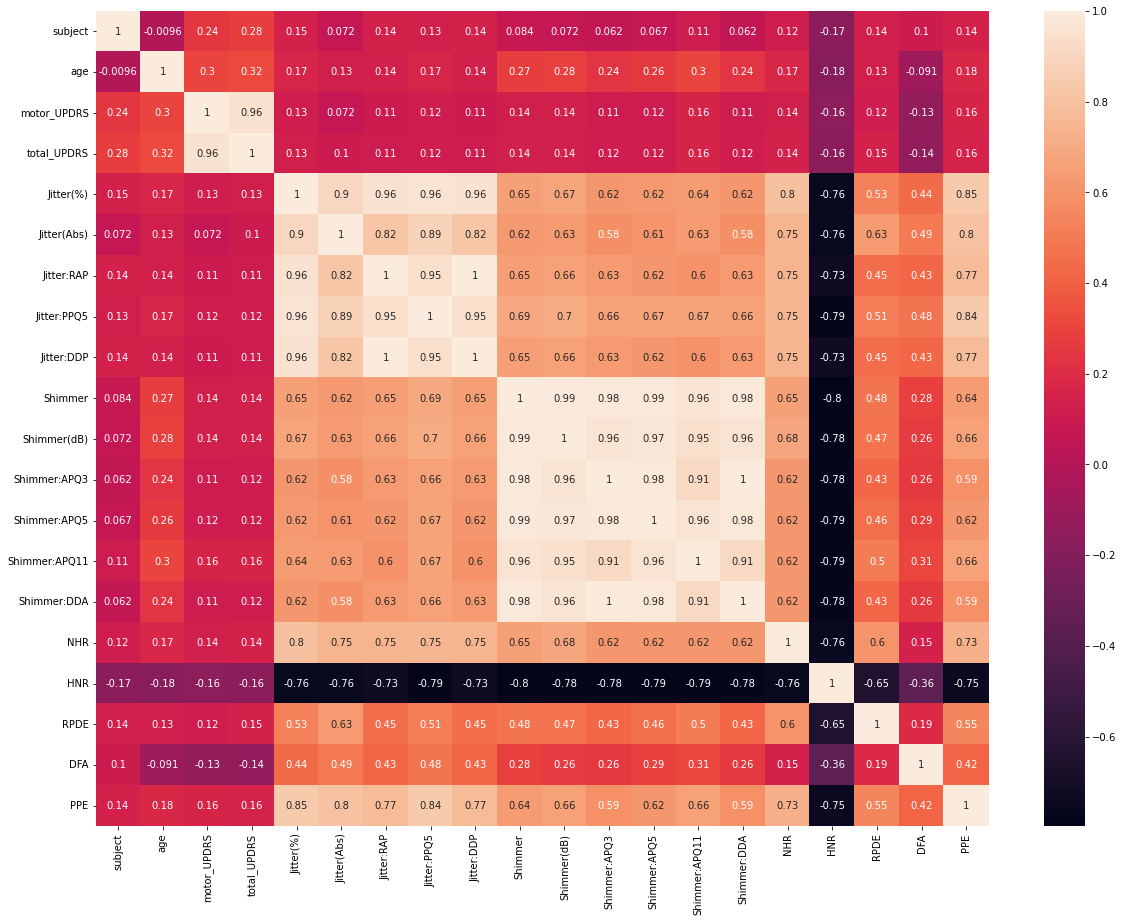

In [95]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(method='spearman'),annot=True)
plt.show

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1 ,random_state=0)

In [97]:
print(len(X_test))
print(len(X_train))
print(len(Y_test))
print(len(Y_train))

588
5287
588
5287


In [99]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)
X_train

,subject,age,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.525887,1.042433,1.260953,0.958379,0.310511,0.067061,0.461915,0.357296,0.460833,-0.382659,-0.477601,-0.424275,-0.330333,-0.379838,-0.424019,-0.203927,19.412,1.648165,0.927279,0.371085
1,-1.656596,0.815695,1.031639,0.779864,0.278504,-0.119430,0.442706,0.247412,0.441624,0.816971,0.847138,1.093556,0.634707,0.556390,1.093811,-0.234486,20.744,-1.213075,-1.509672,-0.006658
2,-0.282440,0.022114,-1.881781,-1.975335,-0.372307,-0.613033,-0.290434,-0.331487,-0.289378,0.367158,0.239061,0.460434,0.232007,0.365741,0.460438,-0.350440,25.452,-0.160263,-0.361229,-0.451950
3,0.121724,-0.658098,-1.061959,-0.240850,-0.430987,-0.662227,-0.440903,-0.444051,-0.440915,-0.655566,-0.707801,-0.620709,-0.634609,-0.765639,-0.620704,-0.258042,26.323,-0.285836,0.067004,-1.009930
4,1.415047,0.135483,0.897422,0.913050,-0.450547,-0.537714,-0.453709,-0.355608,-0.453721,-0.620340,-0.594873,-0.644130,-0.613004,-0.662058,-0.643874,-0.354914,24.893,-0.144220,-0.760405,-0.703778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,1.172549,-0.317992,0.552466,0.261610,2.229160,2.057873,2.033843,2.967703,2.034889,4.230053,3.887522,4.502443,5.152633,3.467154,4.502695,2.843828,7.892,1.397019,-0.646435,1.199584
5283,0.202557,-0.544730,-0.984824,-1.069029,0.525670,1.493675,0.442706,0.268853,0.441624,-0.445370,-0.481944,-0.499071,-0.308128,-0.304280,-0.499067,0.348453,17.563,0.181200,1.473008,0.886875
5284,-0.767436,-0.317992,-0.774578,-0.551148,1.267168,1.474498,1.307106,0.778070,1.307088,0.176704,0.100072,0.390171,0.036958,0.060504,0.390426,0.480994,14.946,0.148915,0.644752,1.152148
5285,-0.201607,-1.111573,-0.405511,-0.281974,1.560567,1.686281,1.550419,1.279247,1.549333,0.820455,0.812391,1.089023,0.809951,0.746538,1.089278,0.398665,18.038,-0.256919,1.130535,1.411846


In [109]:
from tensorflow import keras
from tensorflow.keras import layers
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=20, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(480, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(480, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(224, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(416, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    
    # Compile model
    opt = keras.optimizers.Adam(learning_rate=0.004607)
    model.compile(loss='mean_squared_error', optimizer=opt,metrics=["mae"])
    return model

In [110]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=10000, batch_size=50, verbose=1)
early_stopping=EarlyStopping(monitor="val_mae",patience=50, min_delta=0)
history = estimator.fit(X_train,Y_train,validation_split=0.2,callbacks=[early_stopping])#validation_split=0.2

Epoch 1/10000
85/85 [==============================] - 3s 9ms/step - loss: 383.8280 - mae: 19.3339 - val_loss: 187.7387 - val_mae: 13.0783
Epoch 2/10000
85/85 [==============================] - 1s 6ms/step - loss: 52.2492 - mae: 5.7216 - val_loss: 518.4653 - val_mae: 13.3642
Epoch 3/10000
85/85 [==============================] - 1s 6ms/step - loss: 1.2303 - mae: 0.7500 - val_loss: 84.6820 - val_mae: 7.6148
Epoch 4/10000
85/85 [==============================] - 1s 6ms/step - loss: 1.2573 - mae: 0.7843 - val_loss: 61.8950 - val_mae: 6.2390
Epoch 5/10000
85/85 [==============================] - 1s 6ms/step - loss: 1.2522 - mae: 0.8034 - val_loss: 34.4858 - val_mae: 5.1633
Epoch 6/10000
85/85 [==============================] - 1s 6ms/step - loss: 1.2513 - mae: 0.7922 - val_loss: 15.8553 - val_mae: 3.3548
Epoch 7/10000
85/85 [==============================] - 1s 6ms/step - loss: 1.2318 - mae: 0.7951 - val_loss: 9.3475 - val_mae: 2.7121
Epoch 8/10000
85/85 [==============================] - 

Epoch 62/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8978 - mae: 0.7216 - val_loss: 6.4128 - val_mae: 1.4946
Epoch 63/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8858 - mae: 0.7146 - val_loss: 3.6030 - val_mae: 1.4331
Epoch 64/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.7738 - mae: 0.6681 - val_loss: 4.6288 - val_mae: 1.5670
Epoch 65/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.7095 - mae: 0.6627 - val_loss: 1.6789 - val_mae: 0.9076
Epoch 66/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8187 - mae: 0.7072 - val_loss: 2.2116 - val_mae: 1.1627
Epoch 67/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8919 - mae: 0.7280 - val_loss: 2.7986 - val_mae: 1.2029
Epoch 68/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8555 - mae: 0.7373 - val_loss: 1.2424 - val_mae: 0.7826
Epoch 69/10000
85/85 [==============================] - 1s 6ms

Epoch 123/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.7835 - mae: 0.6930 - val_loss: 2.0056 - val_mae: 0.9473
Epoch 124/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8091 - mae: 0.6815 - val_loss: 0.7090 - val_mae: 0.5838
Epoch 125/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.5617 - mae: 0.5866 - val_loss: 1.3525 - val_mae: 0.9640
Epoch 126/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.8086 - mae: 0.6834 - val_loss: 0.0707 - val_mae: 0.1976
Epoch 127/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.6579 - mae: 0.6384 - val_loss: 0.4954 - val_mae: 0.5529
Epoch 128/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.7576 - mae: 0.6521 - val_loss: 0.2687 - val_mae: 0.4339
Epoch 129/10000
85/85 [==============================] - 1s 6ms/step - loss: 0.6790 - mae: 0.6287 - val_loss: 1.4134 - val_mae: 0.9871
Epoch 130/10000
85/85 [==============================] 

In [111]:
Y_pred = estimator.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [119]:
history.history

{'loss': [383.8280029296875,
  52.24918746948242,
  1.2303427457809448,
  1.257301926612854,
  1.2522321939468384,
  1.2512503862380981,
  1.2318131923675537,
  1.1338820457458496,
  1.2999682426452637,
  1.0835908651351929,
  1.0527222156524658,
  1.0001890659332275,
  1.1580857038497925,
  0.9919546246528625,
  1.1344425678253174,
  1.8259069919586182,
  1.2310377359390259,
  1.1876691579818726,
  1.0898185968399048,
  1.3316231966018677,
  0.9292847514152527,
  0.9499204158782959,
  0.9390137791633606,
  1.0111156702041626,
  0.9721237421035767,
  0.8737798929214478,
  0.98753422498703,
  0.8832615613937378,
  1.0413302183151245,
  0.9427017569541931,
  0.8066351413726807,
  1.1299961805343628,
  0.8823017477989197,
  1.107116937637329,
  0.8298538327217102,
  0.7879334688186646,
  0.8855445384979248,
  0.7963623404502869,
  0.9415209889411926,
  0.9194567203521729,
  0.7379862070083618,
  0.8279499411582947,
  0.7637552618980408,
  0.8473692536354065,
  0.7931594252586365,
  0.8289

In [113]:
# 計算 MSE
from sklearn import metrics
def mape(Y_test, Y_pred):
    return np.mean(np.abs((Y_pred - Y_test) / Y_test)) * 100
# RMSE
print("The RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) # 2.847304489713536
# MAE
print("The MAE: %.2f" % metrics.mean_absolute_error(Y_test, Y_pred)) # 1.9285714285714286
# MAPE
print("The MAPE: %.2f" % mape(Y_test, Y_pred)) # 76.07142857142858，即76%

The RMSE: 0.55
The MAE: 0.51
The MAPE: 2.69


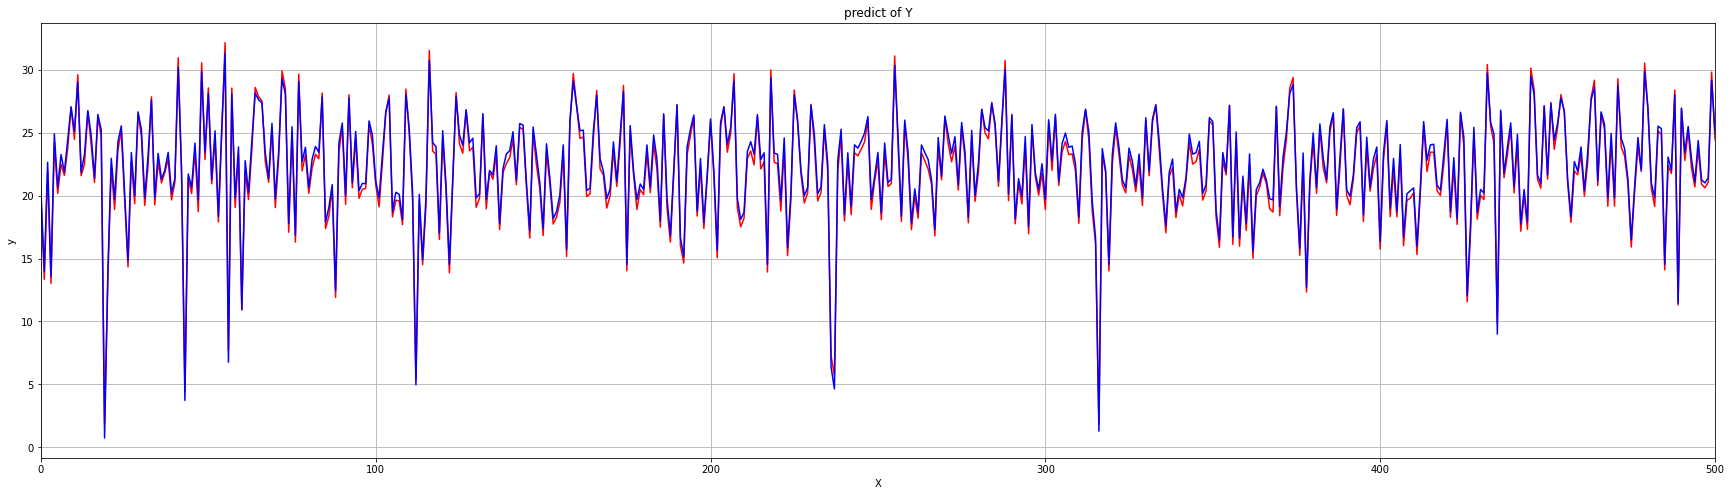

In [114]:
plt.figure(figsize=(30,8))
plt.plot(Y_test, color='r')
plt.plot(Y_pred, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 500])  #僅取500~1000筆的資料做對比
plt.grid(True)

plt.show()

In [115]:
Y_test

0      19.880
1      13.349
2      21.910
3      13.022
4      24.205
        ...  
583    19.729
584    19.079
585    21.171
586    23.940
587    22.697
Name: HNR, Length: 588, dtype: float64

# 模型優化器

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_layers", 1, 20)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu"]),
                
            )
        )
        model.add(BatchNormalization()),
    model.add(keras.layers.Dense(1, activation='relu'))
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(loss='mse',optimizer=keras.optimizers.Adam(learning_rate=lr),)
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(X_train, Y_train, epochs=200, validation_split=0.2)
best_model = tuner.get_best_models()[0]

In [ ]:
tuner.results_summary()

# 參數紀錄

In [ ]:
# Hyperparameters:
# num_layers: 15
# units_0: 320
# activation: relu
# lr: 0.0046070796416100655
# units_1: 480
# units_2: 480
# units_3: 224
# units_4: 416
# units_5: 128
# units_6: 128
# units_7: 128
# units_8: 32
# units_9: 32
# units_10: 32
# units_11: 32
# units_12: 32
# units_13: 32
# units_14: 32
# Score: 0.07308843731880188
# Trial summary

In [ ]:
# Hyperparameters:
# num_layers: 1
# units_0: 512
# activation: relu
# lr: 0.006472773112854373
# units_1: 480
# units_2: 448
# units_3: 64
# units_4: 128
# units_5: 352
# units_6: 448
# Score: 1.3026316165924072
# Trial summary

In [ ]:
# Hyperparameters:
# num_layers: 8
# units_0: 320
# activation: relu
# lr: 0.00856854479280256
# units_1: 480
# units_2: 288
# units_3: 96
# units_4: 32
# units_5: 64
# units_6: 352
# units_7: 320
# units_8: 64
# units_9: 384
# units_10: 160
# units_11: 288
# units_12: 96
# units_13: 416
# units_14: 320
# units_15: 288
# units_16: 96
# units_17: 352
# units_18: 416
# Score: 1.7179744243621826

In [ ]:
# num_layers: 8
# units_0: 416
# activation: relu
# lr: 0.00043170278801235427
# units_1: 256
# units_2: 256
# units_3: 288
# units_4: 160
# units_5: 128
# units_6: 224
# units_7: 416
# units_8: 352
# units_9: 480
# units_10: 160
# units_11: 32
# units_12: 448
# units_13: 224
# Score: 1.8772584199905396

In [ ]:
# Hyperparameters:
# num_layers: 6
# units_0: 384
# activation: relu
# lr: 0.0012988621192420286
# units_1: 416
# units_2: 96
# units_3: 320
# units_4: 352
# units_5: 416
# units_6: 96
# units_7: 480
# Score: 1.9485973119735718
# Trial summary